# KNN 基础

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# 创建测试用例
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [51]:
# 创建训练集
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

In [52]:
X_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [53]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

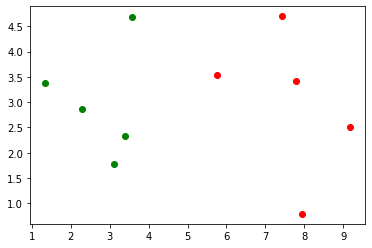

In [54]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.show()

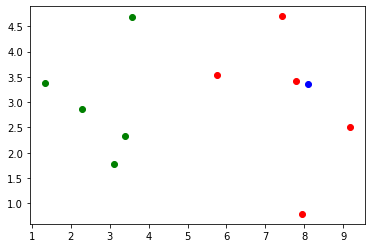

In [55]:
# 预测
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1],color='b')

# KNN 实现过程

In [56]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))  # 距离计算公式
    distances.append(d)

In [57]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [58]:
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]

In [59]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [60]:
# 对距离进行排序，返回的是位置的索引
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [61]:
nearest = np.argsort(distances)

In [62]:
# 初始化一个k值
k = 6
# 计算离x最近的6个点
topK_y = [y_train[neighbor] for neighbor in nearest[:k]]

In [63]:
topK_y

[1, 1, 1, 1, 1, 0]

In [64]:
from collections import Counter
votes = Counter(topK_y) # 统计元素出现个数

In [65]:
votes

Counter({1: 5, 0: 1})

In [66]:
votes.most_common(1) # 找出出现次数最多的字典值

[(1, 5)]

In [67]:
predict_y = votes.most_common(1)[0][0]

In [68]:
predict_y

1

# 使用scikit-learn中的KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
# 创建一个实例
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [71]:
# 进行拟合
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [73]:
X_predict = x.reshape(1,-1) # -1 表示自动计算

In [74]:
X_predict

array([[8.09360732, 3.36573151]])

In [75]:
kNN_classifier.predict(X_predict)

array([1])

In [76]:
y_predict = kNN_classifier.predict(X_predict)

In [77]:
y_predict[0]

1

# 测试我们的算法

In [80]:
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [81]:
iris = datasets.load_iris()

In [82]:
X = iris.data
y = iris.target

In [83]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [84]:
X.shape, y.shape

((150, 4), (150,))

In [89]:
# 将训练集与测试集拆分
shuffle_indexes = np.random.permutation(len(X)) # 将这150个数的索引打乱

In [90]:
shuffle_indexes

array([ 23,  71,  82,  86,  62, 140,  93,  95,  94,  41,  92,  14,   6,
        39,  88, 136,  17,  80,  48,  70,  87,  84,  98, 119, 148,  22,
        43,   2, 128,  78, 100,   7,  10, 111, 135, 147,  66, 117,  99,
       143,  68, 145,  32, 108,  38, 124,   1, 104,  67, 114, 125,  79,
        21, 109, 105,   3,  83,  36,  91, 146, 132,  89,  40, 110,  11,
       101, 133,  30,  18,  34, 102, 106,  76,  75,  53,  49,  35,  96,
        28,  20, 123, 131,  27, 126,  54,   4,  77,   0,  15,  59, 120,
        50,  61, 130,  58,  90,  69,  73,  74, 103,  51,  46, 127, 137,
       107,  81, 139,  65,   5, 141,   8,  12,  57,  45,   9,  25,  55,
        33,  56, 121, 118,  64, 134, 138,  60,  52,  29,  72,  85, 129,
        19,  97, 142,  26, 144,  13,  63,  47, 112,  24, 115,  31, 149,
       122, 113,  44,  42, 116,  37,  16])

In [91]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [88]:
test_size

30

In [92]:
# 确定测试集与训练集
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [93]:
X_test = X[test_indexes]
y_test = y[test_indexes]

X_train = X[train_indexes]
y_train = y[train_indexes]

In [94]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [111]:
kNN_classifier = KNeighborsClassifier(n_neighbors=3)

In [112]:
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
y_predict =  kNN_classifier.predict(X_test)

In [114]:
y_predict

array([0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 2, 1, 2, 2, 1, 2])

In [115]:
y_test

array([0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 1, 2, 2, 2, 2])

In [116]:
sum(y_predict == y_test)

27

# sklearn 中的train_test_split

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))